In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = 'new dataset.csv'
df = pd.read_csv(data)

In [3]:
df.shape

(11, 9)

In [4]:
df.head()

,M:P Blends,SENSOR 1,SENSOR 2,SENSOR 3,SENSOR 4,SENSOR 5,SENSOR 6,SENSOR 7,SENSOR 8
0,100:0,2.79492,0.69781,3.28598,1.32697,0.28424,1.45367,0.58745,1.68367
1,98:02,0.10183,0.27391,0.39414,0.16561,0.51281,0.23676,0.37418,0.22437
2,96:04,0.13343,0.16767,0.53161,0.16116,0.29535,0.24654,0.48047,0.24632
3,95:05,0.14894,0.21117,0.50989,0.12105,0.64315,0.22343,0.86366,0.21249
4,94:06,0.11608,0.24025,0.61854,0.18683,0.01027,0.27455,0.55266,0.27851


In [5]:
df.tail()

,M:P Blends,SENSOR 1,SENSOR 2,SENSOR 3,SENSOR 4,SENSOR 5,SENSOR 6,SENSOR 7,SENSOR 8
6,90:10,0.125830,0.261160,0.15486,0.15486,0.35259,0.25379,0.40259,0.23382
7,85:15,0.076589,0.013710,0.51905,0.00638,10.37405,0.21229,6.78347,0.10782
8,80:20,0.050620,0.053050,0.12270,0.11408,3.60825,0.01303,2.70918,0.05253
9,70:30,0.062620,0.098064,0.06139,0.11710,2.11649,0.07130,1.59176,0.10966
10,0:100,0.038190,0.092150,0.24748,0.01603,2.33795,0.00597,0.86120,0.04735


In [6]:
df.columns

Index(['M:P Blends', 'SENSOR 1', 'SENSOR 2', 'SENSOR 3', 'SENSOR 4',
       'SENSOR 5', 'SENSOR 6', 'SENSOR 7', 'SENSOR 8'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   M:P Blends  11 non-null     object 
 1   SENSOR 1    11 non-null     float64
 2   SENSOR 2    11 non-null     float64
 3   SENSOR 3    11 non-null     float64
 4   SENSOR 4    11 non-null     float64
 5   SENSOR 5    11 non-null     float64
 6   SENSOR 6    11 non-null     float64
 7   SENSOR 7    11 non-null     float64
 8   SENSOR 8    11 non-null     float64
dtypes: float64(8), object(1)
memory usage: 924.0+ bytes


In [8]:
x= df.iloc[ 0].values  
y= df.iloc[ 0].values

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

ValueError: could not convert string to float: '100:0'

In [11]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)

ValueError: could not convert string to float: '100:0'

In [12]:
x_train

array([0.69781, 2.79492, 1.32697, 1.68367, 1.45367, 3.28598, '100:0',
       0.28424], dtype=object)

In [13]:
y_train

array([0.69781, 2.79492, 1.32697, 1.68367, 1.45367, 3.28598, '100:0',
       0.28424], dtype=object)

In [14]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float64', 'str']

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


ValueError: could not convert string to float: '100:0'

In [16]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)

ValueError: could not convert string to float: '100:0'

In [17]:
y_pred= classifier.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [18]:
y_pred

NameError: name 'y_pred' is not defined

In [19]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Sensor Data')  
plt.ylabel('Y Scale')  
plt.legend()  
plt.show() 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [1]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

NameError: name 'accuracy_score' is not defined

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv("Reading Data.csv")

# Separate features (X) and target variable (y)
X = data.drop("SENSOR 4", axis=1)  # Assuming the target variable is named "M"
y = data["M"]

# Preprocessing (optional, but often recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = reg.predict(X_test)

# Evaluate model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print(y_pred)


Mean Squared Error: 0.005218812823280412
[91.99861719 99.87488201 69.99987893]


In [4]:
import matplotlib.pyplot as plt


In [21]:
feature_to_plot = "M"  # Replace with the actual feature name
column_index = 0  # Replace with the correct index
X_plot = X_test[:, column_index]  # Access using integer index
y_plot = y_test.values
y_pred_plot = y_pred


In [22]:
X_test

array([[ 0.37443747, -0.37443747, -0.24950083,  0.0855477 , -0.30560639,
        -0.48764475, -0.17630217, -0.37732106, -0.18740785],
       [ 0.66863834, -0.66863834,  3.15860527,  2.77252503,  3.09486925,
        -0.5644769 ,  3.06379311, -0.4784966 ,  3.11302563],
       [-0.43461492,  0.43461492, -0.36486504, -0.65299982, -0.64597994,
         0.07059199, -0.58349078,  0.07706168, -0.45763284]])

In [12]:
X_test.ravel()

array([ 0.37443747, -0.37443747,  0.0855477 , -0.30560639, -0.25347821,
       -0.48764475, -0.17630217, -0.37732106, -0.18740785,  0.66863834,
       -0.66863834,  2.77252503,  3.09486925,  3.12308859, -0.5644769 ,
        3.06379311, -0.4784966 ,  3.11302563, -0.43461492,  0.43461492,
       -0.65299982, -0.64597994, -0.31543513,  0.07059199, -0.58349078,
        0.07706168, -0.45763284])

In [23]:
y_pred

array([91.99861719, 99.87488201, 69.99987893])

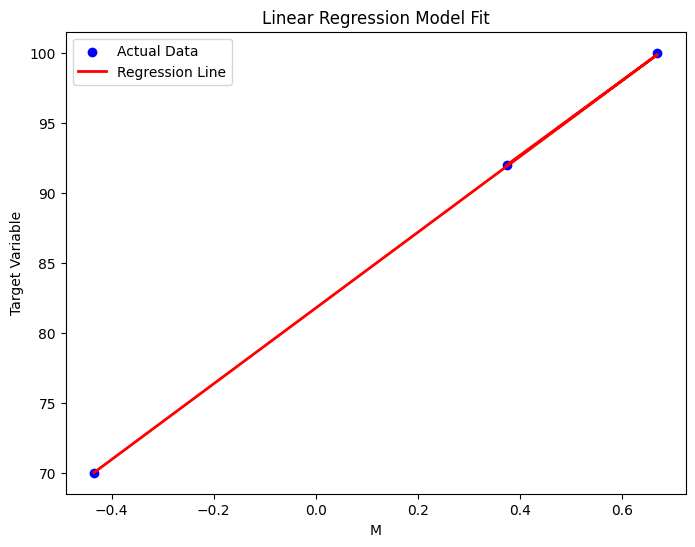

In [24]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Scatter plot of actual data points
plt.scatter(X_plot, y_plot, label="Actual Data", color="blue")

# Plot the regression line
plt.plot(X_plot, y_pred_plot, color="red", linewidth=2, label="Regression Line")

# Add labels and title
plt.xlabel(feature_to_plot)
plt.ylabel("Target Variable")
plt.title("Linear Regression Model Fit")
plt.legend()

plt.show()


In [25]:
from scipy.spatial.distance import mahalanobis

for i in range(len(X_test)):
    data_point = X_test.iloc[i]  # Assuming X_test is a pandas DataFrame
    mahalanobis_distance = mahalanobis(data_point, mu, inv(cov_matrix))
    print("Mahalanobis distance for data point", i, ":", mahalanobis_distance)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [26]:
from scipy.spatial.distance import mahalanobis

for i in range(len(X_test)):
    data_point = X_test[i]  # Use array indexing
    mahalanobis_distance = mahalanobis(data_point, mu, inv(cov_matrix))
    print("Mahalanobis distance for data point", i, ":", mahalanobis_distance)


NameError: name 'mu' is not defined

In [27]:
from scipy.spatial.distance import mahalanobis

mu = X_train.mean(axis=0)  # Calculate the mean of training data

for i in range(len(X_test)):
    data_point = X_test[i]
    mahalanobis_distance = mahalanobis(data_point, mu, inv(cov_matrix))
    print("Mahalanobis distance for data point", i, ":", mahalanobis_distance)


NameError: name 'inv' is not defined

In [28]:
from scipy.spatial.distance import mahalanobis
import numpy as np  # Import numpy for inv()

mu = X_train.mean(axis=0)  # Calculate the mean of training data

for i in range(len(X_test)):
    data_point = X_test[i]
    mahalanobis_distance = mahalanobis(data_point, mu, np.inv(cov_matrix))  # Use np.inv()
    print("Mahalanobis distance for data point", i, ":", mahalanobis_distance)


AttributeError: module 'numpy' has no attribute 'inv'

In [29]:
from scipy.spatial.distance import mahalanobis
import numpy as np

mu = X_train.mean(axis=0)

for i in range(len(X_test)):
    data_point = X_test[i]
    mahalanobis_distance = mahalanobis(data_point, mu, np.linalg.inv(cov_matrix))  # Use np.linalg.inv()
    print("Mahalanobis distance for data point", i, ":", mahalanobis_distance)


NameError: name 'cov_matrix' is not defined

In [30]:
from scipy.spatial.distance import mahalanobis
import numpy as np

mu = X_train.mean(axis=0)
cov_matrix = np.cov(residuals.T)  # Calculate covariance matrix

for i in range(len(X_test)):
    data_point = X_test[i]
    mahalanobis_distance = mahalanobis(data_point, mu, np.linalg.inv(cov_matrix))
    print("Mahalanobis distance for data point", i, ":", mahalanobis_distance)


NameError: name 'residuals' is not defined